In [87]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [88]:
# importing the load_model function to load the trained model
from tensorflow.keras.models import load_model

In [91]:
# loading the trained model

filepath = "./model/mnist_classifier.h5"
cnn = load_model(filepath)

In [3]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1

In [131]:
def predict(path_image):
    image = cv2.imread(path_image)
    # converting to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # resizing the image to the dimensions with which it was trained
    gray = cv2.resize(gray, (28, 28), interpolation = cv2.INTER_AREA)
    # reshaping the image as the same dimension as that of the training set
    gray = gray.reshape(1, 28, 28, 1)
    # giving the image to the model for prediction
    predicted = np.argmax(cnn.predict(gray))
    print('Predicted : ', predicted)
    plt.imshow(image)

Predicted :  5


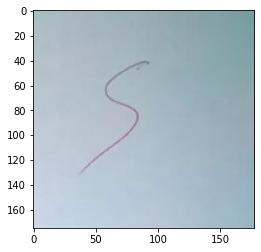

In [133]:
predict("./data_own/4.png")